In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore
from sklearn.model_selection import train_test_split

# Stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

# Random exploration of data

In [14]:
train, validate, test = wrangle_explore()

In [15]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
108,Taiwan,natou county,20,2015,2015-06-09,Typica,Semi-washed / Semi-pulped,7.67,7.83,8.0,7.58,8.0,7.92,10.0,10.0,10.0,7.92,84.92,0.11,0,0.0,Green,0,800.0,40.0,6,2015,9,1


In [16]:
train.processing_method.value_counts()

Washed / Wet                 359
Natural / Dry                 84
Semi-washed / Semi-pulped     28
Name: processing_method, dtype: int64

In [17]:
# df_plus will be the dataframe that holds all the values of where our target excellent rating is true
df_rating = train[train.excellent_rating == 1]

In [18]:
# 
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_

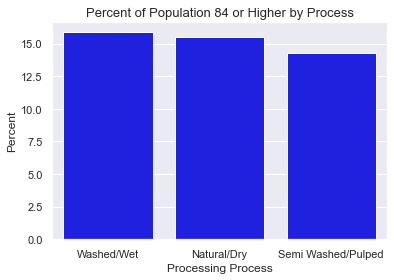

In [19]:
ax = sns.barplot(s.index, s, color='blue')

ax.set_title('Percent of Population 84 or Higher by Process', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Process', ylabel='Percent')
plt.show()

In [62]:
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_

['Other',
 'Caturra',
 'Catuai',
 'Mundo Novo',
 'Bourbon',
 'Typica',
 'Yellow Bourbon']

In [63]:
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

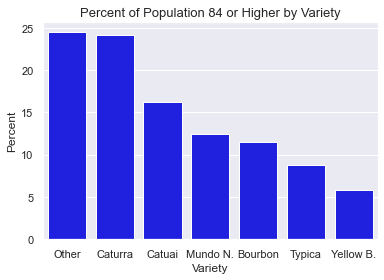

In [64]:
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

In [22]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
108,Taiwan,natou county,20,2015,2015-06-09,Typica,Semi-washed / Semi-pulped,7.67,7.83,8.0,7.58,8.0,7.92,10.0,10.0,10.0,7.92,84.92,0.11,0,0.0,Green,0,800.0,40.0,6,2015,9,1


# Checking for any variance by Harvest Year

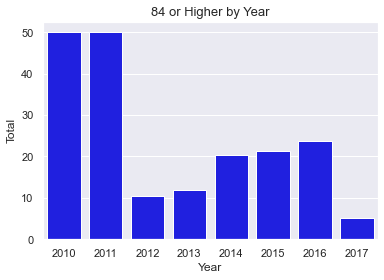

In [23]:
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

# Check for variance by grading month

In [24]:
df_plus.grading_month.value_counts()

NameError: name 'df_plus' is not defined

In [25]:
train.grading_month.value_counts()

7     63
6     49
8     47
5     46
3     45
12    43
4     39
9     38
10    34
2     25
1     23
11    19
Name: grading_month, dtype: int64

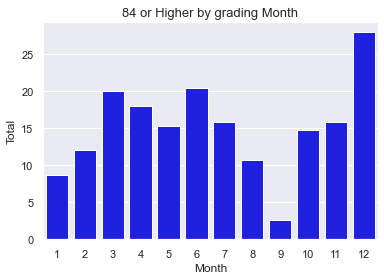

In [56]:
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by grading Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

In [57]:
df_rating.grading_year.value_counts()

2015    18
2012    13
2013    11
2014    11
2016     9
2011     6
2017     6
Name: grading_year, dtype: int64

In [58]:
train.grading_year.value_counts()

2012    135
2014     79
2015     78
2013     75
2017     57
2016     35
2011     11
2010      1
Name: grading_year, dtype: int64

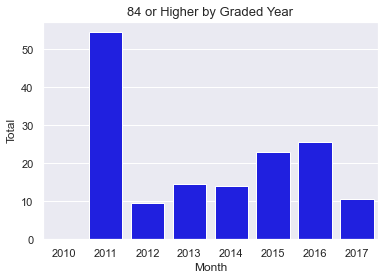

In [59]:
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

<AxesSubplot:>

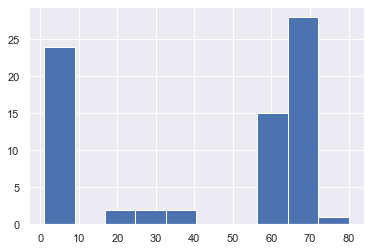

In [65]:
df_rating.bag_weight.hist()

In [66]:
df_rating.bag_weight.value_counts()

70.0    15
60.0    14
1.0     14
69.0    12
2.0      6
20.0     2
30.0     2
7.0      2
80.0     1
59.0     1
5.0      1
66.0     1
40.0     1
4.0      1
34.0     1
Name: bag_weight, dtype: int64

In [67]:
train.bag_weight.value_counts()

1.0        149
69.0       100
60.0        64
70.0        54
2.0         46
30.0        11
20.0         8
59.0         4
10.0         4
7.0          4
11.0         3
5.0          3
50.0         3
80.0         3
9.0          2
18975.0      2
24.0         1
4.0          1
66.0         1
350.0        1
34.0         1
29.0         1
1500.0       1
40.0         1
18.0         1
67.0         1
6.0          1
Name: bag_weight, dtype: int64